In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [2]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          source_priors=dict(source_frame_masses='binary_masses_uniform',),
          source_priors_params=dict(
              source_frame_masses=dict(
                  m_min=1,
                  m_max=3,
              ),
          ),
          )

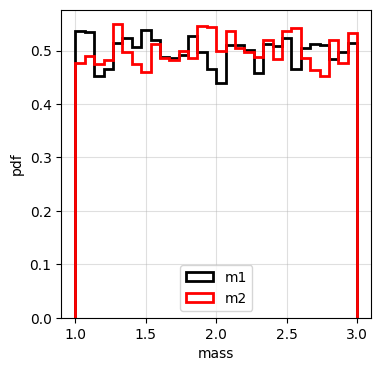

In [3]:
m1,m2 = ler.sample_source_frame_masses(size=10000)
plt.figure(figsize=(4,4))
plt.hist(m1, bins=30, histtype='step', lw=2, color='k', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', lw=2, color='r', label='m2', density=True)
plt.xlabel('mass')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


## Un-lensed events

In [14]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_uniformL1.json', meta_data_file='n_unlensed_detectable_bns_uniforL1_meta.json', resume=True);

collected number of detectable events =  500
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_uniformL1.json

 trmming final result to size=500


In [15]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniforL1_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

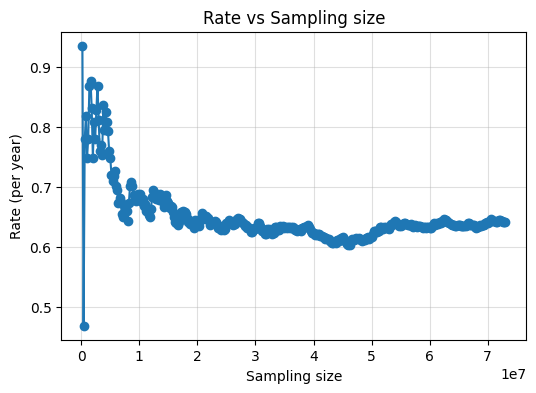

In [16]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [17]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e7)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.6377504944904474


## Lensed events

In [18]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_uniformL1.json', meta_data_file='n_lensed_detectable_bns_uniformL1_meta.json', resume=True);

collected number of detectable events =  502.0
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_uniformL1.json

 trmming final result to size=500


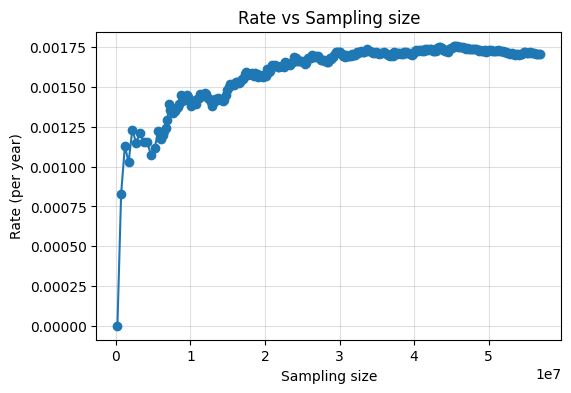

In [19]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [20]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 4e7)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.0017290031509547478


In [21]:
# rate comparison
rate_unlensed/rate_lensed

368.85444317338835

In [22]:
rate_lensed/rate_unlensed

0.0027110965273906907

## Looking at the parameters

### Event

In [10]:
# convert redshift to luminosity distance with astropy
from astropy.cosmology import Planck18
from astropy import units as u
from ler.rates import LeR
from scipy.interpolate import interp1d
import numpy as np

ler = LeR(verbose=False)

z_to_dl = lambda z: Planck18.luminosity_distance(z).to(u.Mpc).value

z = np.linspace(0, 10, 1000)
luminosity_distance = Planck18.luminosity_distance(z).value
from scipy.interpolate import interp1d
dl_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

In [11]:
import h5py

# read h5 file
f = h5py.File('posterior_samples.h5', 'r')

# unlensed 
events = f['Combined_PHM_lowSecondarySpin']['posterior_samples']
#events['mass_1']
# detector farme
m1 = np.array(events['mass_1_source'])
m2 = np.array(events['mass_2_source'])
unlensed_mass_1 = m1[:945]
unlensed_mass_2 = m2[:945]
unlensed_chirp_mass = ( (m1*m2)**(3/5) )/( (m1+m2)**(1/5) )
unlensed_chirp_mass = unlensed_chirp_mass
dl = np.array(events['luminosity_distance'])
unlensed_redshift = dl_to_z(dl)

### Unlensed

In [12]:
# get the unlensed event
from ler.utils import get_param_from_json
unlensed_params1 = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniformL1.json')

m1_unlensed1 = unlensed_params1['mass_1_source']
m2_unlensed1 = unlensed_params1['mass_2_source']
mc_unlensed1 = ( (m1_unlensed1*m2_unlensed1)**(3/5) )/( (m1_unlensed1+m2_unlensed1)**(1/5) )
zs_unlensed1 = unlensed_params1['zs']

In [13]:
unlensed_params2 = get_param_from_json('ler_data/n_unlensed_detectable_bns.json')

m1_unlensed2 = unlensed_params2['mass_1_source']
m2_unlensed2 = unlensed_params2['mass_2_source']
mc_unlensed2 = ( (m1_unlensed2*m2_unlensed2)**(3/5) )/( (m1_unlensed2+m2_unlensed2)**(1/5) )
zs_unlensed2 = unlensed_params2['zs']

### Lensed

In [14]:
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

# detectable
lensed_params_detectable1 = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1.json')

# detector frame masses
m1_l_det1 = np.array(lensed_params_detectable1['mass_1'])
m2_l_det1 = np.array(lensed_params_detectable1['mass_2'])
# chirp mass
mc_l_det1 = m1_l_det1
mc_l_det1 = np.array([mc_l_det1, mc_l_det1, mc_l_det1, mc_l_det1]).T
m1_l_det1 = np.array([m1_l_det1, m1_l_det1, m1_l_det1, m1_l_det1]).T
m2_l_det1 = np.array([m2_l_det1, m2_l_det1, m2_l_det1, m2_l_det1]).T

# redshifts
zs_l_det1 = np.array(lensed_params_detectable1['zs'])
zs_l_det1 = np.array([zs_l_det1, zs_l_det1, zs_l_det1, zs_l_det1]).T

# observed
dl_l_eff_det1 = np.array(lensed_params_detectable1['effective_luminosity_distance'])
zs_l_eff_det1 = dl_to_z(np.array(dl_l_eff_det1))
mc_l_eff_det1 = mc_l_det1/(1+zs_l_eff_det1)
m1_l_eff_det1 = m1_l_det1/(1+zs_l_eff_det1)
m2_l_eff_det1 = m2_l_det1/(1+zs_l_eff_det1)

# avoid nan
zs_l_eff_det1 = zs_l_eff_det1.flatten()
mc_l_eff_det1 = mc_l_eff_det1.flatten()
m1_l_eff_det1 = m1_l_eff_det1.flatten()

m2_l_eff_det1 = m2_l_eff_det1.flatten()
zs_l_det1 = zs_l_det1.flatten()
idx_nan1 = np.isnan(zs_l_eff_det1)
zs_l_eff_det1 = zs_l_eff_det1[~idx_nan1]
mc_l_eff_det1 = mc_l_eff_det1[~idx_nan1]
m1_l_eff_det1 = m1_l_eff_det1[~idx_nan1]
m2_l_eff_det1 = m2_l_eff_det1[~idx_nan1]
zs_l_det1 = zs_l_det1[~idx_nan1]

# choose only detectable
snr_l_det1 = np.array(lensed_params_detectable1['optimal_snr_net']).flatten()
snr_l_det1 = snr_l_det1[~idx_nan1]
idx_detectable1 = snr_l_det1 > 8
zs_l_eff_det1 = zs_l_eff_det1[idx_detectable1]
mc_l_eff_det1 = mc_l_eff_det1[idx_detectable1]
m1_l_eff_det1 = m1_l_eff_det1[idx_detectable1]
m2_l_eff_det1 = m2_l_eff_det1[idx_detectable1]
zs_l_det1 = zs_l_det1[idx_detectable1]

# magnification
mu_l_det1 = abs(np.array(lensed_params_detectable1['magnifications']).flatten())
mu_l_det1 = mu_l_det1[~idx_nan1]
mu_l_det1 = mu_l_det1[idx_detectable1]

In [15]:
from ler.utils import get_param_from_json

# detectable
lensed_params_detectable2 = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# detector frame masses
m1_l_det2 = np.array(lensed_params_detectable2['mass_1'])
m2_l_det2 = np.array(lensed_params_detectable2['mass_2'])
# chirp mass
mc_l_det2 = m1_l_det2
mc_l_det2 = np.array([mc_l_det2, mc_l_det2, mc_l_det2, mc_l_det2]).T
m1_l_det2 = np.array([m1_l_det2, m1_l_det2, m1_l_det2, m1_l_det2]).T
m2_l_det2 = np.array([m2_l_det2, m2_l_det2, m2_l_det2, m2_l_det2]).T

# redshifts
zs_l_det2 = np.array(lensed_params_detectable2['zs'])
zs_l_det2 = np.array([zs_l_det2, zs_l_det2, zs_l_det2, zs_l_det2]).T

# observed
dl_l_eff_det2 = np.array(lensed_params_detectable2['effective_luminosity_distance'])
zs_l_eff_det2 = dl_to_z(np.array(dl_l_eff_det2))
mc_l_eff_det2 = mc_l_det2/(1+zs_l_eff_det2)
m1_l_eff_det2 = m1_l_det2/(1+zs_l_eff_det2)
m2_l_eff_det2 = m2_l_det2/(1+zs_l_eff_det2)

# avoid nan
zs_l_eff_det2 = zs_l_eff_det2.flatten()
mc_l_eff_det2 = mc_l_eff_det2.flatten()
m1_l_eff_det2 = m1_l_eff_det2.flatten()
m2_l_eff_det2 = m2_l_eff_det2.flatten()
zs_l_det2 = zs_l_det2.flatten()
idx_nan2 = np.isnan(zs_l_eff_det2)
zs_l_eff_det2 = zs_l_eff_det2[~idx_nan2]
mc_l_eff_det2 = mc_l_eff_det2[~idx_nan2]
m1_l_eff_det2 = m1_l_eff_det2[~idx_nan2]
m2_l_eff_det2 = m2_l_eff_det2[~idx_nan2]
zs_l_det2 = zs_l_det2[~idx_nan2]

# choose only detectable
snr_l_det2 = np.array(lensed_params_detectable2['optimal_snr_net']).flatten()
snr_l_det2 = snr_l_det2[~idx_nan2]
idx_detectable2 = snr_l_det2 > 8
zs_l_eff_det2 = zs_l_eff_det2[idx_detectable2]
mc_l_eff_det2 = mc_l_eff_det2[idx_detectable2]
m1_l_eff_det2 = m1_l_eff_det2[idx_detectable2]
m2_l_eff_det2 = m2_l_eff_det2[idx_detectable2]
zs_l_det2 = zs_l_det2[idx_detectable2]

# magnification
mu_l_det2 = abs(np.array(lensed_params_detectable2['magnifications']).flatten())
mu_l_det2 = mu_l_det2[~idx_nan2]
mu_l_det2 = mu_l_det2[idx_detectable2]

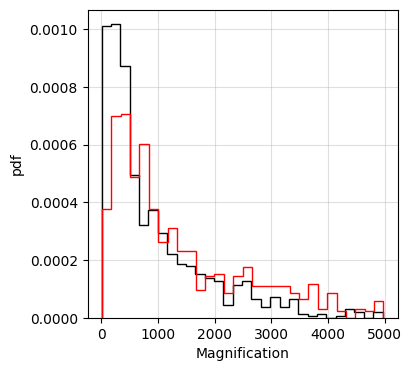

In [16]:
# plot magnification
plt.figure(figsize=(4,4))
mu_l_det1_ = mu_l_det1[mu_l_det1<5000]
mu_l_det2_ = mu_l_det2[mu_l_det2<5000]
plt.hist(mu_l_det1_, bins=30, histtype='step', lw=1, color='k', density=True, label='uniform')
plt.hist(mu_l_det2_, bins=30, histtype='step', lw=1, color='r', density=True, label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

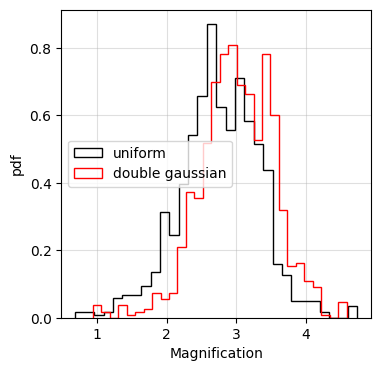

In [ ]:
# plot magnification
plt.figure(figsize=(4,4))
mu_l_det1_ = np.log10(mu_l_det1)
mu_l_det2_ = np.log10(mu_l_det2)
plt.hist(mu_l_det1_, bins=30, histtype='step', lw=1, color='k', density=True, label='uniform')
plt.hist(mu_l_det2_, bins=30, histtype='step', lw=1, color='r', density=True, label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

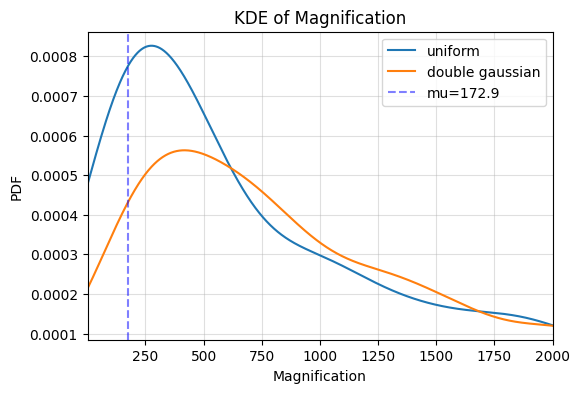

In [44]:
# find kde of magnification
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(mu_l_det1, bw_method=0.05)
kde2 = gaussian_kde(mu_l_det2, bw_method=0.05)

x = np.linspace(0, 2000, 1000)
plt.figure(figsize=(6,4))
plt.plot(x, kde1(x), label='uniform')
plt.plot(x, kde2(x), label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('PDF')
#plt.xscale('log')
plt.xlim(1, 2000)
plt.title('KDE of Magnification')
plt.grid(alpha=0.4)

# draw vertical lines for the peak of the kde
# plt.axvline(x=x[np.argmax(kde1(x))], color='k', ls='--')
# plt.axvline(x=x[np.argmax(kde2(x))], color='r', ls='--')
plt.axvline(x=172.9, color='b', ls='--', label='mu=172.9', alpha=0.5)

plt.legend()
plt.show()

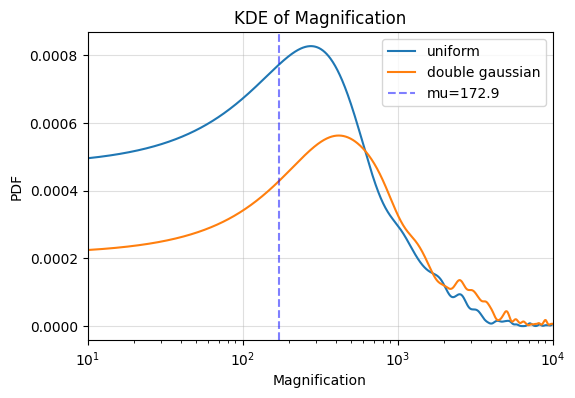

In [48]:
# find kde of magnification
from scipy.stats import gaussian_kde
kde1 = gaussian_kde(mu_l_det1, bw_method=0.05)
kde2 = gaussian_kde(mu_l_det2, bw_method=0.05)

x = np.geomspace(10, 10000, 1000)
plt.figure(figsize=(6,4))
plt.plot(x, kde1(x), label='uniform')
plt.plot(x, kde2(x), label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('PDF')
plt.xscale('log')
plt.xlim(10, 10000)
plt.title('KDE of Magnification')
plt.grid(alpha=0.4)

# draw vertical lines for the peak of the kde
# plt.axvline(x=x[np.argmax(kde1(x))], color='k', ls='--')
# plt.axvline(x=x[np.argmax(kde2(x))], color='r', ls='--')
plt.axvline(x=172.9, color='b', ls='--', label='mu=172.9', alpha=0.5)

plt.legend()
plt.show()

In [24]:
# find the peak in the kde
from scipy.signal import find_peaks

peaks1, _ = find_peaks(kde1(x))
peaks2, _ = find_peaks(kde2(x))

print('Peak in uniform:', x[peaks1][0])
print('Peak in double gaussian:', x[peaks2][0])

Peak in uniform: 276.2762762762763
Peak in double gaussian: 418.41841841841847


In [25]:
len(zs_l_eff_det1)

879

In [26]:
# unlened
# Assuming your data is loaded and you have mass, redshift arrays
# Replace these with your actual data arrays
# mass = unlensed_mass_1  # Your mass data
# redshift = unlensed_redshift  # Your redshift data
mass = m1_unlensed1[:879]  # Your mass data
redshift = zs_unlensed1[:879]  # Your redshift data

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels1 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X1, Y1 = np.meshgrid(xgrid, ygrid)
Z1 = gaussian_kde(xy)(np.vstack([X1.ravel(), Y1.ravel()])).reshape(X1.shape)

#lensed
# Assuming your data is loaded and you have mass, redshift arrays
# Replace these with your actual data arrays
mass = m1_l_eff_det1  # Your mass data
redshift = zs_l_eff_det1  # Your redshift data

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels2 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X2, Y2 = np.meshgrid(xgrid, ygrid)
Z2 = gaussian_kde(xy)(np.vstack([X2.ravel(), Y2.ravel()])).reshape(X2.shape)

# event
mass = unlensed_mass_1[:879]
redshift = unlensed_redshift[:879]

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels3 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X3, Y3 = np.meshgrid(xgrid, ygrid)
Z3 = gaussian_kde(xy)(np.vstack([X3.ravel(), Y3.ravel()])).reshape(X3.shape)

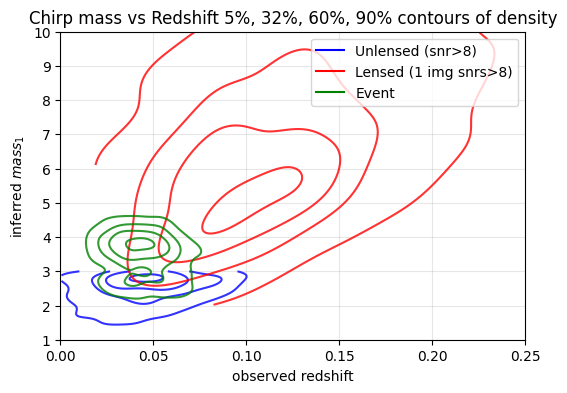

In [27]:
# Plotting
plt.figure(figsize=(6, 4))
plt.contour(X1, Y1, Z1, levels=levels1, colors=['blue', 'blue', 'blue', 'blue', 'blue'], alpha=0.8)
plt.contour(X2, Y2, Z2, levels=levels2, colors=['red', 'red', 'red', 'red', 'red'], alpha=0.8)
plt.contour(X3, Y3, Z3, levels=levels3, colors=['green', 'green', 'green', 'green', 'green'], alpha=0.8)

plt.xlabel("observed redshift")
plt.ylabel(r"inferred $mass_1$")
plt.title("Chirp mass vs Redshift 5%, 32%, 60%, 90% contours of density")
# plt.colorbar(contour1, label='Density')
plt.xlim(0, 0.25)
plt.ylim(1, 10)
plt.grid(alpha=0.3)
# Add legend
# Create proxy artists for legend
proxy1 = plt.Line2D([0], [0], linestyle='-', color='blue', label='Unlensed (snr>8)')
proxy2 = plt.Line2D([0], [0], linestyle='-', color='red', label='Lensed (1 img snrs>8)')
proxy3 = plt.Line2D([0], [0], linestyle='-', color='green', label='Event')
plt.legend(handles=[proxy1, proxy2, proxy3])
plt.show()

In [40]:

from scipy.stats import gaussian_kde

# unlened
# Assuming your data is loaded and you have mass, redshift arrays
# Replace these with your actual data arrays
# mass = unlensed_mass_1  # Your mass data
# redshift = unlensed_redshift  # Your redshift data
mass = m2_unlensed1[:879]  # Your mass data
redshift = zs_unlensed1[:879]  # Your redshift data

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels1 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X1, Y1 = np.meshgrid(xgrid, ygrid)
Z1 = gaussian_kde(xy)(np.vstack([X1.ravel(), Y1.ravel()])).reshape(X1.shape)

#lensed
# Assuming your data is loaded and you have mass, redshift arrays
# Replace these with your actual data arrays
mass = m2_l_eff_det1  # Your mass data
redshift = zs_l_eff_det1  # Your redshift data

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels2 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X2, Y2 = np.meshgrid(xgrid, ygrid)
Z2 = gaussian_kde(xy)(np.vstack([X2.ravel(), Y2.ravel()])).reshape(X2.shape)

# event
mass = unlensed_mass_2[:879]
redshift = unlensed_redshift[:879]

# Perform a kernel density estimation (KDE)
xy = np.vstack([redshift, mass])
kde = gaussian_kde(xy)(xy)

# Define the levels for contour as percentiles of the density
levels3 = np.percentile(kde, [5, 32, 60, 90])

# Create a grid for contour plot
xgrid = np.linspace(min(redshift), max(redshift), 1000)
ygrid = np.linspace(min(mass), max(mass), 1000)
X3, Y3 = np.meshgrid(xgrid, ygrid)
Z3 = gaussian_kde(xy)(np.vstack([X3.ravel(), Y3.ravel()])).reshape(X3.shape)

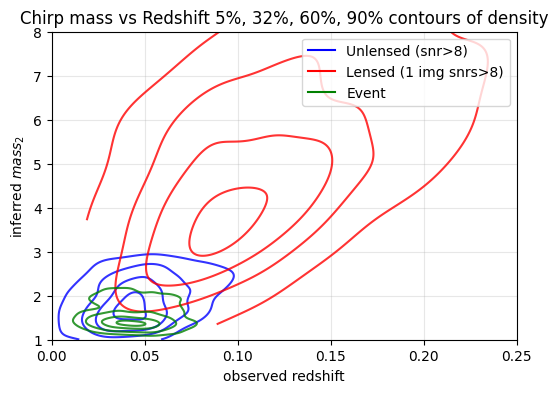

In [41]:
# Plotting
plt.figure(figsize=(6, 4))
plt.contour(X1, Y1, Z1, levels=levels1, colors=['blue', 'blue', 'blue', 'blue', 'blue'], alpha=0.8)
plt.contour(X2, Y2, Z2, levels=levels2, colors=['red', 'red', 'red', 'red', 'red'], alpha=0.8)
plt.contour(X3, Y3, Z3, levels=levels3, colors=['green', 'green', 'green', 'green', 'green'], alpha=0.8)

plt.xlabel("observed redshift")
plt.ylabel(r"inferred $mass_2$")
plt.title("Chirp mass vs Redshift 5%, 32%, 60%, 90% contours of density")
# plt.colorbar(contour1, label='Density')
plt.xlim(0, 0.25)
plt.ylim(1, 8)
plt.grid(alpha=0.3)
# Add legend
# Create proxy artists for legend
proxy1 = plt.Line2D([0], [0], linestyle='-', color='blue', label='Unlensed (snr>8)')
proxy2 = plt.Line2D([0], [0], linestyle='-', color='red', label='Lensed (1 img snrs>8)')
proxy3 = plt.Line2D([0], [0], linestyle='-', color='green', label='Event')
plt.legend(handles=[proxy1, proxy2, proxy3])
plt.show()

In [42]:
1/539

0.0018552875695732839

In [36]:
len(mc_l_eff_det1)

879

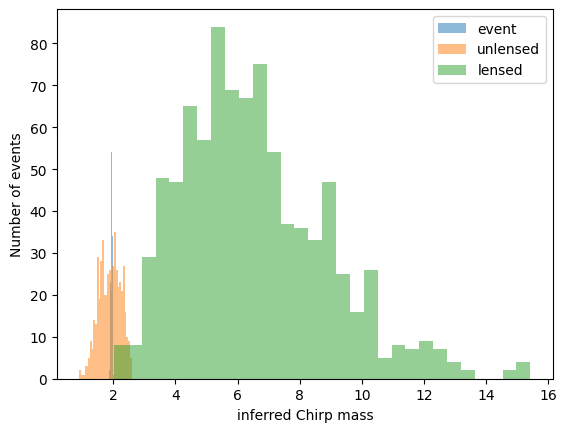

In [38]:
plt.hist(unlensed_chirp_mass[:879], bins=30, alpha=0.5, density=False, label='event')
plt.hist(mc_unlensed1[:879], bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(mc_l_eff_det1, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred Chirp mass')
plt.ylabel('Number of events')
plt.legend()
plt.show()

In [ ]:
plt.hist(unlensed_chirp_mass[:879], bins=30, alpha=0.5, density=False, label='event')
plt.hist(mc_unlensed1[:879], bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(mc_l_eff_det1, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred Chirp mass')
plt.ylabel('Number of events')
plt.legend()
plt.show()

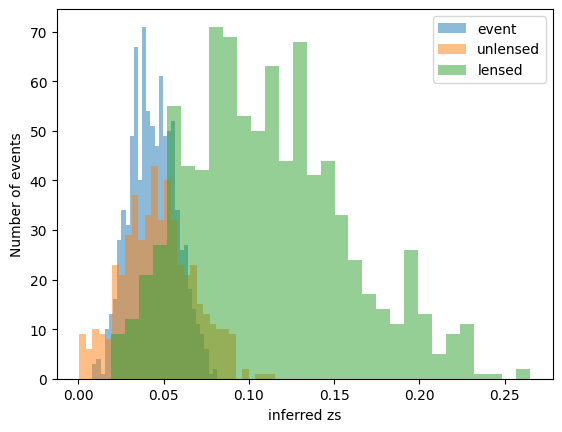

In [51]:
plt.hist(unlensed_redshift[:879], bins=30, alpha=0.5, density=False, label='event')
plt.hist(zs_unlensed1[:879], bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(zs_l_eff_det1, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred zs')
plt.ylabel('Number of events')
plt.legend()
plt.show()

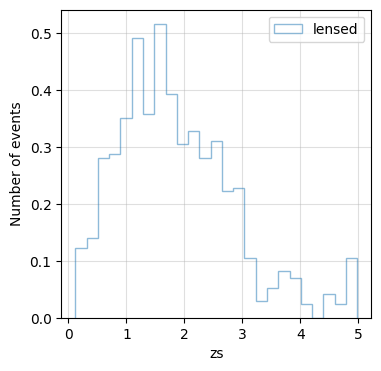

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.hist(zs_l_det1, bins=25, alpha=0.5, density=True, label='lensed', histtype='step')
plt.xlabel('zs')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.hist(zs_l_det1, bins=25, alpha=0.5, density=True, label='lensed', histtype='step')
plt.xlabel('zs')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [ ]:
zs = np.linspace(0, 0.25, 1000)

In [56]:
zs = 1.8
# zs to Dl
dl = z_to_dl(zs)

In [57]:
dl

14000.187832320107

In [1]:
# find detector horizon
from gwsnr import GWSNR

gwsnr = GWSNR(npool=6,
          mtot_max=51,  # for SNR interpolation
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  6
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 51
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='custom_psd.txt', asd_file='None')]
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle


In [9]:
gwsnr.detector_horizon(mass_1=2, mass_2=2)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.73s/it]


{'L1': array([426.19951988]), 'net': array([426.19951988])}

In [10]:
dl_eff = 426
dl = 14000
mu = (dl/dl_eff)**2
print('Magnification:', mu)

Magnification: 1080.0326213934625
